week 1
> Simple code

In [ ]:
#import the libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras #importing keras for the sequential of DL layers


In [ ]:
#create the model
model=tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#compile the model
model.compile(optimizer='sgd',loss='mean_squared_error')

In [ ]:
#declare the model inputs and outputs shape for training through numpy library
x=np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
y=np.array([-3.0,-1.0,1.0,3.0,5.0,7.0], dtype=float)

In [ ]:
#training the model
model.fit(x,y,epochs=500)

In [ ]:
#test the model
print(model.predict([15.0]))

1/1 [==============================] - 0s 97ms/step
[[28.976547]]


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
fminst=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels),(test_images, test_label)=fminst.load_data()

Labels: 9

 IMAGE PIXEL ARRAY 
: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   2   0   1   0  16  94   0   0   2   1   1   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   0   1   0 101 196 187   8   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   1   0   0 161 167 166 112  11   1   0   0   6   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   3   0 121 213 187 183 180 179 155 147 129 175   8]
 [  0   0   0   0   0   0   0   0   0   0   1  

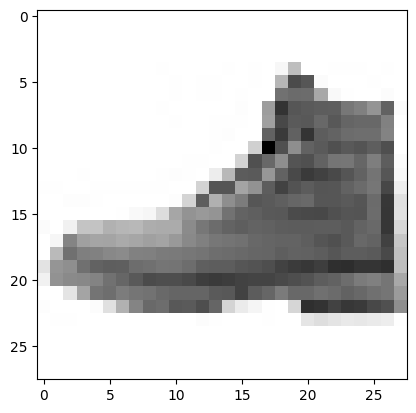

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#you can put a value between 0 and 59999
index=50000

#set number of characters per row when painting
np.set_printoptions(linewidth=320)
#print label and image
print(f'Labels: {training_labels[index]}')
print(f'\n IMAGE PIXEL ARRAY \n: {training_images[index]}')

#show the image
plt.imshow(training_images[index],cmap='Greys')

In [ ]:
#normalize the pixel values of training and test dataset
training_images=training_images/255.0
test_images=test_images/255.0


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.relu)
])

In [ ]:
#Declare sample inputs and convert to a tensor
inputs=np.array([[1.0,3.0,4.0,2.0]])
inputs=tf.convert_to_tensor(inputs)
print(f'input tot softmax function: {inputs.numpy()}')

#Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

#Get the fum of all values after the sotfmax
sum=tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#Get the index with highest value
prediction=np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input tot softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks=MyCallback()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images,training_labels,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.30

In [ ]:
model.evaluate(test_images, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.30259108543396, 0.10000000149011612]